In [21]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [22]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout,Conv2D,MaxPooling2D, Activation,Dropout,Flatten,Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import tensorflow as tf
import keras

import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Number of training images per category:')

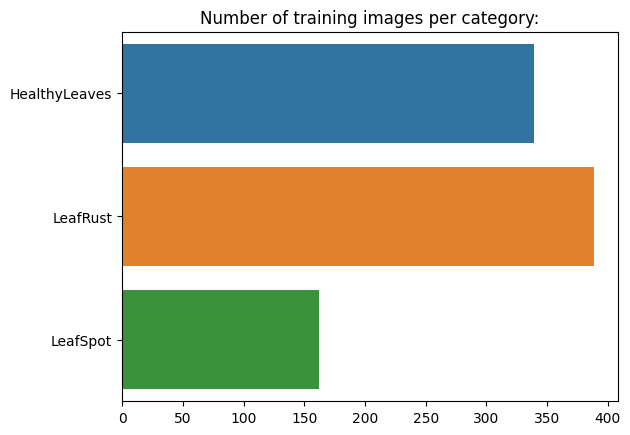

In [23]:
train_dir = "/content/drive/MyDrive/MulberryLeafDataset/train"
test_dir = "/content/drive/MyDrive/MulberryLeafDataset/test"

category_names = sorted(os.listdir("/content/drive/MyDrive/MulberryLeafDataset/train"))
nb_categories = len(category_names)
img_pr_cat = []

for category in category_names:
    folder = "/content/drive/MyDrive/MulberryLeafDataset/train" + '/' + category
    img_pr_cat.append(len(os.listdir(folder)))

sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

In [24]:
folders = glob("/content/drive/MyDrive/MulberryLeafDataset/train/*")

In [25]:
folders

['/content/drive/MyDrive/MulberryLeafDataset/train/LeafRust',
 '/content/drive/MyDrive/MulberryLeafDataset/train/HealthyLeaves',
 '/content/drive/MyDrive/MulberryLeafDataset/train/LeafSpot']

In [26]:
img_height, img_width = 512,512

In [27]:
#Number of images to load at each iteration
batch_size = 64

# only rescaling
train_datagen =  ImageDataGenerator(
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen =  ImageDataGenerator(
    rescale=1./255
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')
train_data = train_datagen.flow_from_directory(
train_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical")


print('Total number of images for "testing":')
test_data = test_datagen.flow_from_directory(
test_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "categorical",
shuffle=False)

Total number of images for "training":
Found 890 images belonging to 3 classes.
Total number of images for "testing":
Found 250 images belonging to 3 classes.


In [28]:
model=tf.keras.Sequential()
model.add(Conv2D(64,(3,3), strides=(2,2), padding='same', input_shape=[512, 512, 3]))
model.add(Activation('relu'))
# model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# model.add(Dropout(0.3))

model.add(Conv2D(256,(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# model.add(keras.layers.Dropout(0.3))

model.add(Conv2D(512,(3,3), strides=(2,2), padding='same'))
model.add(Activation('relu'))
# model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(len(folders)))
model.add(Activation('softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 64)      1792      
                                                                 
 activation_6 (Activation)   (None, 256, 256, 64)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 activation_7 (Activation)   (None, 128, 128, 128)     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 activation_8 (Activation)   (None, 64, 64, 256)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 512)      

In [30]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
  metrics=['accuracy']
)

In [31]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="/content/drive/MyDrive/MulberryLeafDataset_Model/Detection.h5",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [32]:
history = model.fit_generator(train_data,
                              epochs=10,
                              validation_data=test_data,
                               steps_per_epoch=len(train_data),
                              validation_steps=len(test_data),
                              callbacks=[model_checkpoint_callback]
                              )

Epoch 1/10
14/14 [==============================] - 172s 12s/step - loss: 1.0612 - accuracy: 0.4876 - val_loss: 1.0089 - val_accuracy: 0.5960
Epoch 2/10
14/14 [==============================] - 88s 6s/step - loss: 0.9525 - accuracy: 0.6371 - val_loss: 0.8429 - val_accuracy: 0.7840
Epoch 3/10
14/14 [==============================] - 85s 6s/step - loss: 0.7785 - accuracy: 0.7449 - val_loss: 0.5818 - val_accuracy: 0.7840
Epoch 4/10
14/14 [==============================] - 82s 6s/step - loss: 0.6094 - accuracy: 0.7618 - val_loss: 0.4800 - val_accuracy: 0.7600
Epoch 5/10
14/14 [==============================] - 89s 6s/step - loss: 0.5362 - accuracy: 0.7584 - val_loss: 0.5201 - val_accuracy: 0.8160
Epoch 6/10
14/14 [==============================] - 84s 6s/step - loss: 0.6159 - accuracy: 0.7236 - val_loss: 0.3831 - val_accuracy: 0.8160
Epoch 7/10
14/14 [==============================] - 81s 6s/step - loss: 0.4802 - accuracy: 0.8124 - val_loss: 0.3551 - val_accuracy: 0.8160
Epoch 8/10
14/14 [

In [33]:
model.save("/content/drive/MyDrive/MulberryLeafDataset_Model/Detection1.h5")

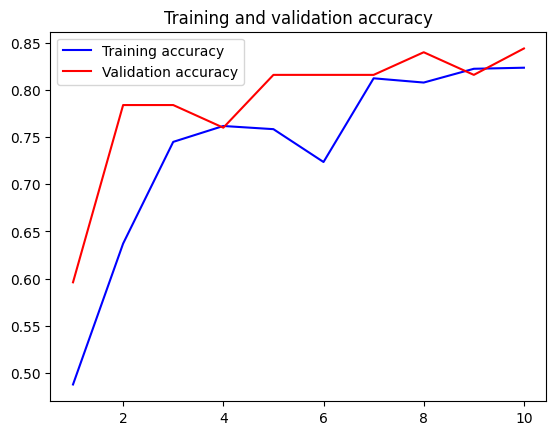

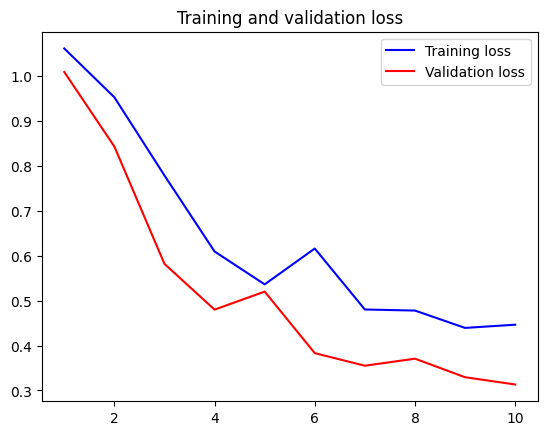

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
# plt.savefig('/content/drive/MyDrive/MulberryLeafDataset_Model/Accuracy.jpg')

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig('/content/drive/MyDrive/MulberryLeafDataset_Model/Loss.jpg')

In [35]:
Y_pred = model.predict_generator(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(confusion_matrix(test_data.classes, y_pred))
print(accuracy_score(test_data.classes, y_pred))
print(classification_report(test_data.classes, y_pred))

[[99  1  0]
 [ 2 88 10]
 [ 0 26 24]]
0.844
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.77      0.88      0.82       100
           2       0.71      0.48      0.57        50

    accuracy                           0.84       250
   macro avg       0.82      0.78      0.79       250
weighted avg       0.84      0.84      0.84       250



1/1 [==============================] - 0s 100ms/step
[0]
Prediction is: HealthyLeaves


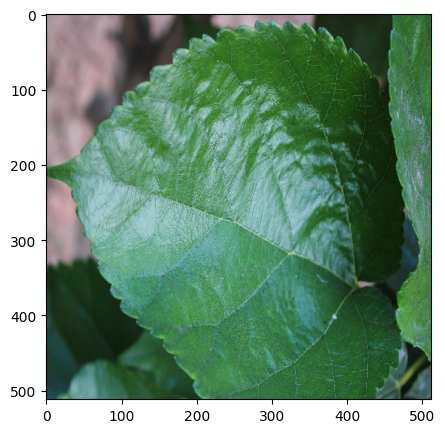

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
model=tf.keras.models.load_model('/content/drive/MyDrive/MulberryLeafDataset_Model/Detection1.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/MyDrive/MulberryLeafDataset/test/HealthyLeaves/h342.JPG', target_size=(512,512))
x = image.img_to_array(img)
x = x.reshape(1, 512, 512, 3)
x = x.astype('float32')
x = x / 255.0
classes = model.predict(x)
New_pred = np.argmax(classes, axis=1)
plt.figure(figsize=(5,5))
plt.imshow(img)
print(New_pred)
if New_pred == [0]:
    print("Prediction is: HealthyLeaves")
elif New_pred == [1]:
    print("Prediction is: LeafRust")
else:
    print("Prediction is: LeafSpot")


1/1 [==============================] - 0s 79ms/step
[1]
Prediction is: LeafRust


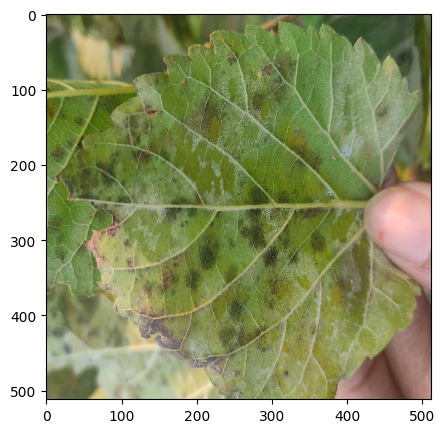

In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
model=tf.keras.models.load_model('/content/drive/MyDrive/MulberryLeafDataset_Model/Detection1.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/MyDrive/MulberryLeafDataset/test/LeafRust/LR398.jpg', target_size=(512,512))
x = image.img_to_array(img)
x = x.reshape(1, 512, 512, 3)
x = x.astype('float32')
x = x / 255.0
classes = model.predict(x)
New_pred = np.argmax(classes, axis=1)
plt.figure(figsize=(5,5))
plt.imshow(img)
print(New_pred)
if New_pred == [0]:
    print("Prediction is: HealthyLeaves")
elif New_pred == [1]:
    print("Prediction is: LeafRust")
else:
    print("Prediction is: LeafSpot")


1/1 [==============================] - 0s 197ms/step
[2]
Prediction is: LeafSpot


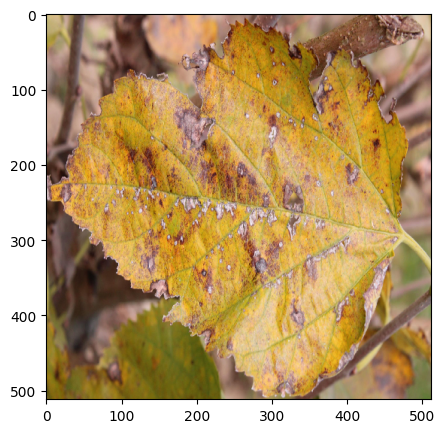

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.models import load_model
model=tf.keras.models.load_model('/content/drive/MyDrive/MulberryLeafDataset_Model/Detection1.h5')
from keras.applications.vgg16 import preprocess_input
img = image.load_img('/content/drive/MyDrive/MulberryLeafDataset/test/LeafSpot/LS135.JPG', target_size=(512,512))
x = image.img_to_array(img)
x = x.reshape(1, 512, 512, 3)
x = x.astype('float32')
x = x / 255.0
classes = model.predict(x)
New_pred = np.argmax(classes, axis=1)
plt.figure(figsize=(5,5))
plt.imshow(img)
print(New_pred)
if New_pred == [0]:
    print("Prediction is: HealthyLeaves")
elif New_pred == [1]:
    print("Prediction is: LeafRust")
else:
    print("Prediction is: LeafSpot")
